## Predicting Stock Performance With Linear Models Using Python

### Task 1: Load and inspect the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:,.2f}".format

In [ ]:
df = pd.read_csv("data.csv", index_col = "Date", parse_dates = ["Date"])
df

### Column Information

__Labels: Daily Stock Return Premiums (in %) over the Risk-free Asset for the following Stocks:__

- AAPL: Apple Inc.
- AJG: Arthur J. Gallagher & Co.
- AVB: AvalonBay Communities Inc.
- DLR: Digital Realty Trust Inc.
- ICE: Intercontinental Exchange Inc.
- INCY: Incyte Corporation
- KHC: The Kraft Heinz Company
- LLY: Eli Lilly And Co.
- MCHP: Microchip Technology Inc.
- MDT: Medtronic PLC
- MOH: Molina Healthcare Inc.
- NDAQ: for Nasdaq Inc.
- PRU: Prudential Financial Inc.
- STLD: Steel Dynamics
- TER: Teradyne Inc.

__Nice-to-know: How to calculate Stock Return Premiums?__ 
Calculate the percentage change of Stock Prices from one trading day to another (Stock Returns) and deduct the daily return of the risk-free asset (short-term Government Bond).  

__Features: Fama/French 5 Factors (daily)__

- The "MARKET RISK" factor: <br>
__Mkt-RF__: Market Risk Premium. The excess return of the market portfolio (Mkt) over the risk-free asset (RF). Market Portfolio Return: Value-weight return of all CRSP firms incorporated in the US and listed on the NYSE, AMEX, or NASDAQ.

- The "SIZE" factor: <br>
__SMB__: SMB (Small Minus Big Company Size) is the average return on nine small stock portfolios minus the average return on nine big stock portfolios. 

- The "VALUE" factor: <br>
__HML__: HML (High Minus Low [Book Value/Market Value]) is the average return on two value portfolios (high book value/market value) minus the average return on two growth portfolios (low book value/market value).

- The "OPERATING PROFITABILITY" factor: <br>
__RMW__: RMW (Robust Minus Weak) is the average return on two robust operating profitability portfolios minus the average return on two weak operating profitability portfolios.

- The "INVESTMENT" factor: <br>
__CMA__: CMA (Conservative Minus Aggressive) is the average return on two conservative investment portfolios minus the average return on two aggressive investment portfolios.

In [2]:
df = pd.read_csv("data.csv", index_col = "Date", parse_dates = ["Date"])
df

,AAPL,AJG,AVB,DLR,ICE,INCY,KHC,LLY,MCHP,MDT,MOH,NDAQ,PRU,STLD,TER,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,,,,,,,,,,,,,,,,
2020-03-02,9.30,6.17,4.52,8.64,4.68,4.83,5.24,5.31,4.97,1.93,3.89,7.38,5.44,2.47,2.94,4.31,-1.91,-0.43,-0.52,0.42
2020-03-03,-3.18,-2.73,-0.45,-0.70,1.64,-1.60,-2.19,-1.91,-6.11,-2.17,-3.85,-0.05,-5.66,-2.31,-3.35,-2.79,0.68,-0.63,-0.44,0.33
2020-03-04,4.63,5.48,4.30,4.15,5.50,3.03,3.72,7.72,4.30,3.17,16.26,5.72,2.81,2.58,6.84,4.03,-1.23,-1.17,0.07,0.28
2020-03-05,-3.25,-3.87,-2.03,-3.79,-2.26,-1.94,0.75,-0.17,-4.92,-3.30,-1.64,-1.96,-6.37,-6.22,-2.97,-3.38,-0.15,-1.40,-0.88,0.05
2020-03-06,-1.33,-1.25,-2.00,-1.26,-3.96,-3.28,-2.33,0.93,-1.95,-1.12,-1.31,-3.16,-3.40,-2.74,-2.81,-1.78,-0.21,-1.49,0.69,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-21,-2.69,-1.10,-1.92,-2.14,-2.77,-0.66,-0.34,-0.29,-3.13,0.80,-1.17,-3.06,-3.40,-2.57,-3.90,-2.16,-1.13,0.91,0.35,0.79
2023-02-22,0.27,-0.16,0.39,-1.65,0.11,0.01,-0.75,0.46,-1.13,-0.47,0.49,0.55,0.24,-1.12,-0.40,-0.04,0.45,-0.43,-0.38,-0.40
2023-02-23,0.31,-0.46,0.69,1.97,-0.53,-1.10,0.41,-0.49,1.76,-1.32,-0.17,0.16,0.15,-1.21,2.19,0.46,0.11,-0.23,-0.02,-0.40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2020-03-02 to 2023-02-27
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    754 non-null    float64
 1   AJG     754 non-null    float64
 2   AVB     754 non-null    float64
 3   DLR     754 non-null    float64
 4   ICE     754 non-null    float64
 5   INCY    754 non-null    float64
 6   KHC     754 non-null    float64
 7   LLY     754 non-null    float64
 8   MCHP    754 non-null    float64
 9   MDT     754 non-null    float64
 10  MOH     754 non-null    float64
 11  NDAQ    754 non-null    float64
 12  PRU     754 non-null    float64
 13  STLD    754 non-null    float64
 14  TER     754 non-null    float64
 15  Mkt-RF  754 non-null    float64
 16  SMB     754 non-null    float64
 17  HML     754 non-null    float64
 18  RMW     754 non-null    float64
 19  CMA     754 non-null    float64
dtypes: float64(20)
memory usage: 123.7 KB


In [4]:
stock = "AAPL"

In [5]:
features = df.columns[-5:].to_list()

In [6]:
filter_list = [stock] + features

In [7]:
data = df[filter_list]
data

,AAPL,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,,
2020-03-02,9.30,4.31,-1.91,-0.43,-0.52,0.42
2020-03-03,-3.18,-2.79,0.68,-0.63,-0.44,0.33
2020-03-04,4.63,4.03,-1.23,-1.17,0.07,0.28
2020-03-05,-3.25,-3.38,-0.15,-1.40,-0.88,0.05
2020-03-06,-1.33,-1.78,-0.21,-1.49,0.69,0.35
...,...,...,...,...,...,...
2023-02-21,-2.69,-2.16,-1.13,0.91,0.35,0.79
2023-02-22,0.27,-0.04,0.45,-0.43,-0.38,-0.40
2023-02-23,0.31,0.46,0.11,-0.23,-0.02,-0.40


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_set, test_set = train_test_split(data, test_size = 0.2, shuffle = False)

In [10]:
train_set

,AAPL,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,,
2020-03-02,9.30,4.31,-1.91,-0.43,-0.52,0.42
2020-03-03,-3.18,-2.79,0.68,-0.63,-0.44,0.33
2020-03-04,4.63,4.03,-1.23,-1.17,0.07,0.28
2020-03-05,-3.25,-3.38,-0.15,-1.40,-0.88,0.05
2020-03-06,-1.33,-1.78,-0.21,-1.49,0.69,0.35
...,...,...,...,...,...,...
2022-07-15,1.14,1.95,0.05,0.47,-0.21,-0.39
2022-07-18,-2.07,-0.71,0.36,1.02,0.12,-0.10
2022-07-19,2.67,2.80,0.85,-0.56,-0.30,-0.61


In [11]:
X_train = train_set[features]
y_train = train_set[stock]

In [12]:
test_set

,AAPL,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,,
2022-07-22,-0.82,-1.19,-0.82,1.37,1.71,1.51
2022-07-25,-0.74,0.11,0.10,1.69,0.64,0.51
2022-07-26,-0.89,-1.32,0.34,1.06,0.57,1.18
2022-07-27,3.42,2.72,0.15,-1.27,-0.21,-1.34
2022-07-28,0.35,1.19,-0.03,-0.86,0.15,-0.86
...,...,...,...,...,...,...
2023-02-21,-2.69,-2.16,-1.13,0.91,0.35,0.79
2023-02-22,0.27,-0.04,0.45,-0.43,-0.38,-0.40
2023-02-23,0.31,0.46,0.11,-0.23,-0.02,-0.40


In [13]:
X_test = test_set[features]
y_test = test_set[stock]

In [14]:
corr_matrix = train_set.corr()

In [15]:
import seaborn as sns

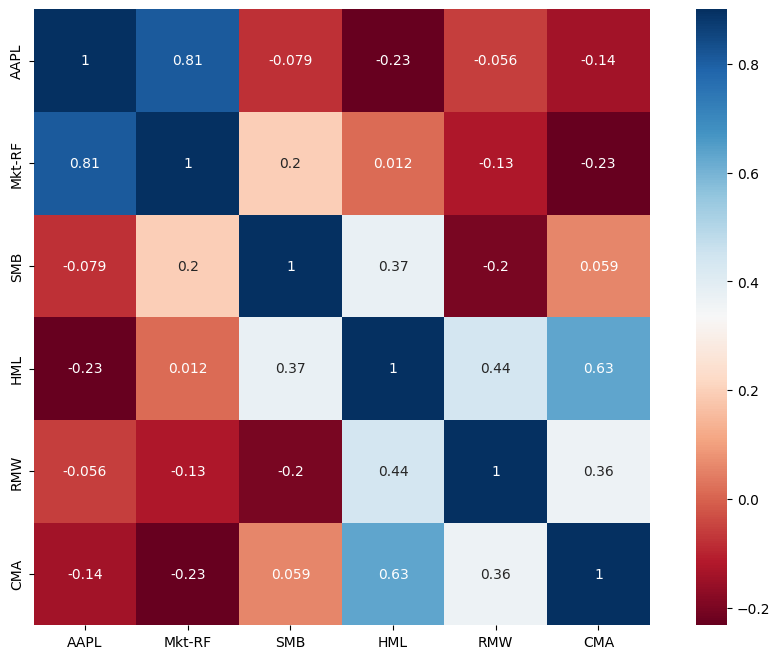

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, vmax=0.9, square=True, annot = True, cmap = "RdBu")
plt.show()

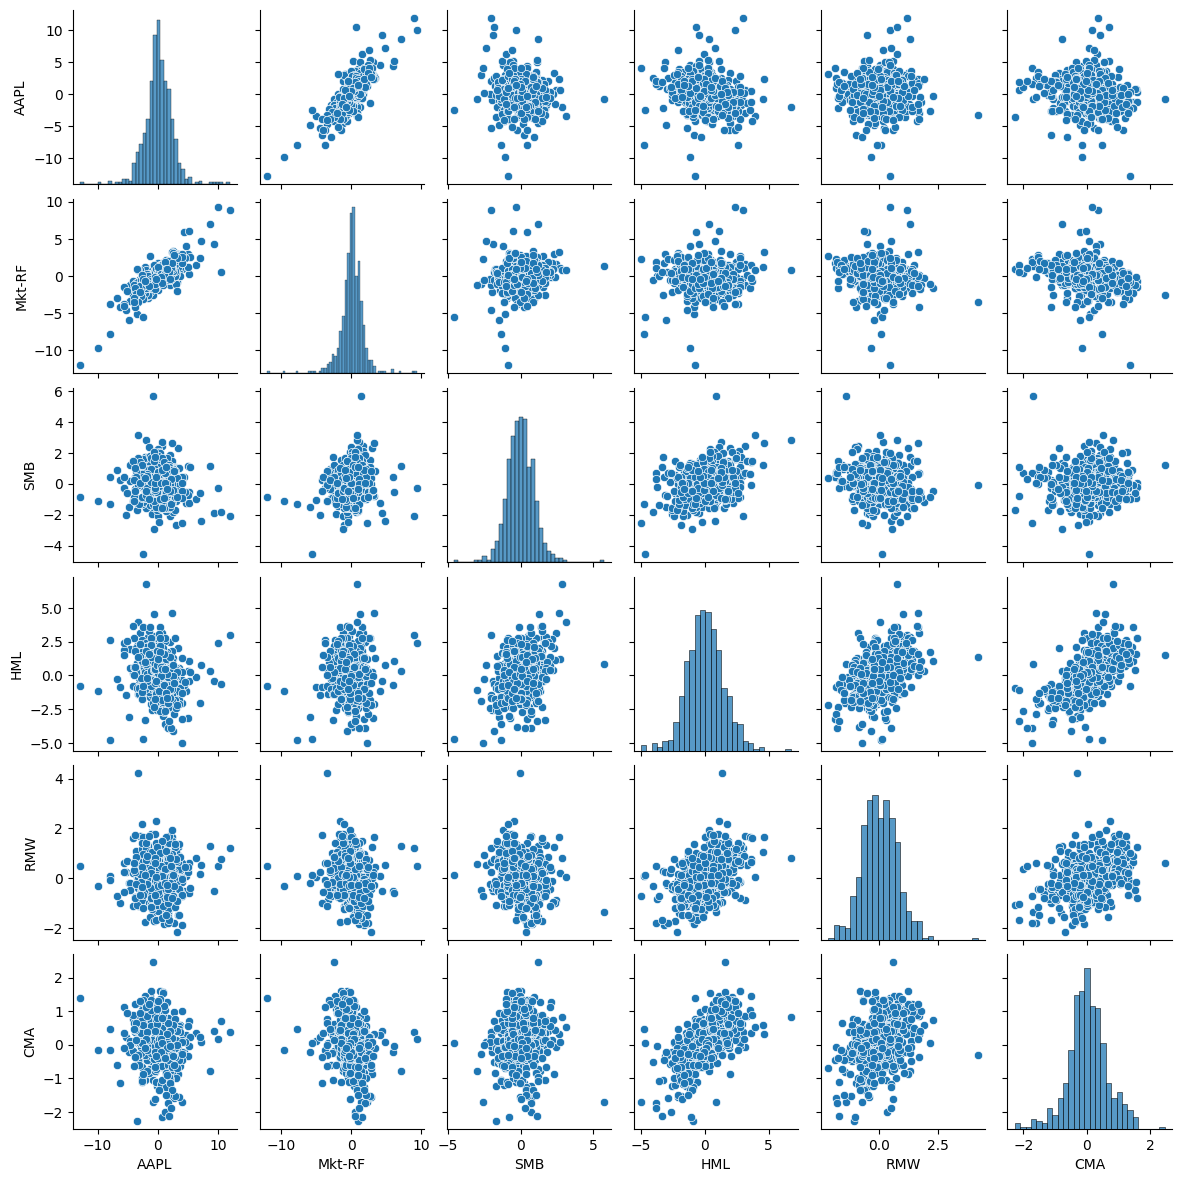

In [17]:
sns.pairplot(train_set, height = 2)
plt.show()

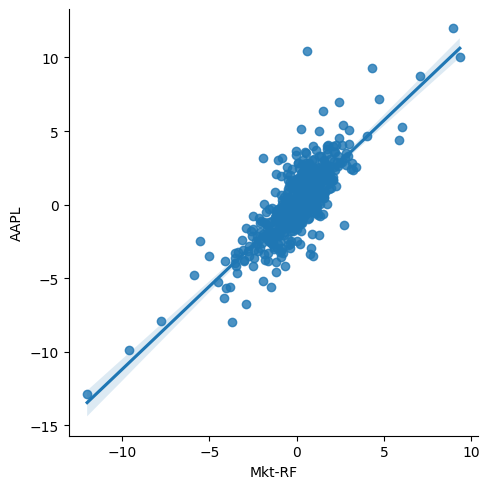

In [18]:
sns.lmplot(x = "Mkt-RF", y = stock, data = train_set)
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
data.describe()

,AAPL,Mkt-RF,SMB,HML,RMW,CMA
count,754.00,754.00,754.00,754.00,754.00,754.00
mean,0.13,0.05,0.02,0.03,0.03,0.03
std,2.31,1.63,0.87,1.36,0.74,0.64
min,-12.87,-12.00,-4.55,-5.00,-2.16,-2.79
25%,-1.08,-0.73,-0.50,-0.80,-0.46,-0.33
50%,0.07,0.08,0.02,0.01,0.01,0.04
75%,1.42,0.92,0.49,0.86,0.55,0.42
max,11.97,9.34,5.71,6.74,4.21,2.46


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [22]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
pipe.fit(X = X_train, y = y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [23]:
pred = pipe.predict(X_train)

In [24]:
from sklearn import metrics

In [25]:
metrics.mean_squared_error(y_true = y_train, y_pred = pred, squared = False)

1.019368081804099

In [26]:
metrics.r2_score(y_true = y_train, y_pred = pred)

0.8102170989448159

In [27]:
pred = pipe.predict(X_test)

In [28]:
lin_rmse = metrics.mean_squared_error(y_true = y_test, y_pred = pred, squared = False)
lin_rmse

1.1849355488806934

In [29]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()

In [30]:
pipe = Pipeline([("scaler", StandardScaler()), ("model", model)])

In [31]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('model', ElasticNet())],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': ElasticNet(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__alpha': 1.0,
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__l1_ratio': 0.5,
 'model__max_iter': 1000,
 'model__normalize': 'deprecated',
 'model__positive': False,
 'model__precompute': False,
 'model__random_state': None,
 'model__selection': 'cyclic',
 'model__tol': 0.0001,
 'model__warm_start': False}

In [32]:
param_grid = [{"model__alpha": np.arange(0.1, 1, 0.05), "model__l1_ratio": np.arange(0.1, 1, 0.05)}]

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

In [34]:
tscv = TimeSeriesSplit(n_splits = 2)

In [35]:
cv_elastic = GridSearchCV(estimator = pipe,
                  cv = tscv, 
                  param_grid = param_grid,
                  scoring = "neg_root_mean_squared_error",
                  refit = True)

In [36]:
cv_elastic.fit(X_train, y_train) 

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', ElasticNet())]),
             param_grid=[{'model__alpha': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                          'model__l1_ratio': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])}],
             scoring='neg_root_mean_squared_error')

In [37]:
cv_elastic.best_params_

{'model__alpha': 0.1, 'model__l1_ratio': 0.9500000000000003}

In [38]:
pred = cv_elastic.predict(X = X_test)

In [39]:
elastic_rmse = metrics.mean_squared_error(y_true = y_test, y_pred = pred, squared = False)
elastic_rmse

1.1355184350702932

In [40]:
from sklearn.svm import LinearSVR
model = LinearSVR(max_iter = 2000)

In [41]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('model', LinearSVR(max_iter=2000))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': LinearSVR(max_iter=2000),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__C': 1.0,
 'model__dual': True,
 'model__epsilon': 0.0,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1.0,
 'model__loss': 'epsilon_insensitive',
 'model__max_iter': 2000,
 'model__random_state': None,
 'model__tol': 0.0001,
 'model__verbose': 0}

In [42]:
param_grid = [{"model__C": np.arange(0.1, 1, 0.05), "model__epsilon": np.arange(0.1, 1, 0.05)}]

In [43]:
cv_svr = GridSearchCV(estimator = pipe,
                  cv = tscv, 
                  param_grid = param_grid,
                  scoring = "neg_root_mean_squared_error",
                  refit = True)
cv_svr.fit(X_train, y_train)
cv_svr.best_params_

{'model__C': 0.9000000000000002, 'model__epsilon': 0.5500000000000002}

In [44]:
pred = cv_svr.predict(X = X_test)
svr_rmse = metrics.mean_squared_error(y_true = y_test, y_pred = pred, squared = False)
svr_rmse


1.1666812268091187

In [45]:
print(lin_rmse, elastic_rmse, svr_rmse)

1.1849355488806934 1.1355184350702932 1.1666812268091187


In [46]:
cv_elastic.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', ElasticNet(alpha=0.1, l1_ratio=0.9500000000000003))])